<a href="https://colab.research.google.com/github/1zulkifel/AI_Q3_NLP/blob/master/NLP(recurrent_layer_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
final_output_sequence = np.concatenate(successive_outputs, axis=0)

In [5]:
# returns only the output at the last timestep
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [6]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))

model.add(SimpleRNN(32, return_sequences=True))

model.add(SimpleRNN(32))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


#Preparing the IMDB data

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


#Training the model with Embedding and SimpleRNN layers

In [7]:
from keras.layers import Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 99s 607ms/step - loss: 0.6059 - acc: 0.6525 - val_loss: 0.5470 - val_acc: 0.7314
Epoch 2/10
157/157 [==============================] - 96s 609ms/step - loss: 0.3841 - acc: 0.8360 - val_loss: 0.3990 - val_acc: 0.8262
Epoch 3/10
157/157 [==============================] - 96s 614ms/step - loss: 0.2956 - acc: 0.8800 - val_loss: 0.3687 - val_acc: 0.8424
Epoch 4/10
157/157 [==============================] - 97s 615ms/step - loss: 0.2314 - acc: 0.9105 - val_loss: 0.3798 - val_acc: 0.8444
Epoch 5/10
157/157 [==============================] - 95s 608ms/step - loss: 0.1743 - acc: 0.9341 - val_loss: 0.3751 - val_acc: 0.8644
Epoch 6/10
157/157 [==============================] - 93s 594ms/step - loss: 0.1146 - acc: 0.9607 - val_loss: 0.4643 - val_acc: 0.8526
Epoch 7/10
157/157 [==============================] - 95s 605ms/step - loss: 0.0796 - acc: 0.9738 - val_loss: 0.5392 - val_acc: 0.8118
Epoch 8/10
157/157 [==============================] - 9

#Plotting results

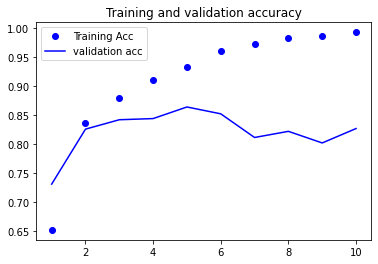

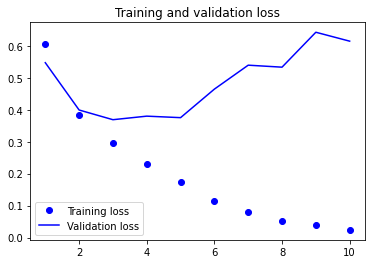

In [8]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training Acc')
plt.plot(epochs,val_acc,'b',label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [11]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,epochs=10,
                    batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 56s 342ms/step - loss: 0.5273 - acc: 0.7527 - val_loss: 0.3712 - val_acc: 0.8592
Epoch 2/10
157/157 [==============================] - 53s 338ms/step - loss: 0.2972 - acc: 0.8852 - val_loss: 0.2948 - val_acc: 0.8880
Epoch 3/10
157/157 [==============================] - 54s 343ms/step - loss: 0.2363 - acc: 0.9087 - val_loss: 0.3067 - val_acc: 0.8636
Epoch 4/10
157/157 [==============================] - 54s 342ms/step - loss: 0.2031 - acc: 0.9254 - val_loss: 0.3458 - val_acc: 0.8416
Epoch 5/10
157/157 [==============================] - 54s 342ms/step - loss: 0.1811 - acc: 0.9333 - val_loss: 0.3835 - val_acc: 0.8482
Epoch 6/10
157/157 [==============================] - 54s 343ms/step - loss: 0.1640 - acc: 0.9394 - val_loss: 0.4913 - val_acc: 0.8320
Epoch 7/10
157/157 [==============================] - 54s 341ms/step - loss: 0.1506 - acc: 0.9485 - val_loss: 0.3336 - val_acc: 0.8790
Epoch 8/10
157/157 [==============================] - 5

#<font color='purple'>Advanced use of recurrent neural networks</font>

In [5]:
!mkdir jena_climate
!cd jena_climate
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2021-06-03 09:36:45--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.104.94
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.104.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  69.8MB/s    in 0.2s    

2021-06-03 09:36:45 (69.8 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
replace __MACOSX/._jena_climate_2009_2016.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


 # Inspecting the data of the Jena weather dataset

In [6]:
import os
data_dir = '/content'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')
f = open(fname)
data = f.read()
f.close()
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]
print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


#  Parsing the data

In [8]:
import numpy as np
float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
  values = [float(x) for x in line.split(',')[1:]]
  float_data[i, :] = values

 # Plotting the temperature timeseries

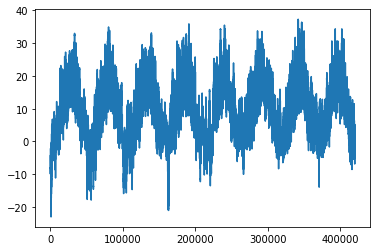

In [9]:
from matplotlib import pyplot as plt
temp = float_data[:, 1]
plt.plot(range(len(temp)), temp)

# Plotting the first 10 days of the temperature timeseries

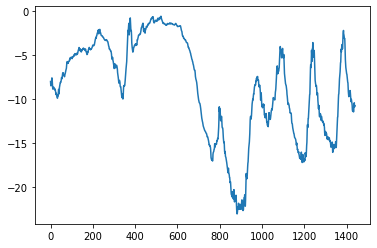

In [10]:
plt.plot(range(1440), temp[:1440])

 # Normalizing the data

In [12]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

# Generator yielding timeseries samples and their targets

In [13]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):  
  if max_index is None:
    max_index = len(data) - delay - 1
  i = min_index + lookback
  while 1:
    if shuffle:
      rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
    else:
      if i + batch_size >= max_index:
          i = min_index + lookback
      rows = np.arange(i, min(i + batch_size, max_index))
      i += len(rows)
    samples = np.zeros((len(rows),
                        lookback // step,
                        data.shape[-1]))
    targets = np.zeros((len(rows),))
    for j, row in enumerate(rows):
      indices = range(rows[j] - lookback, rows[j], step)
      samples[j] = data[indices]
      targets[j] = data[rows[j] + delay][1]
    yield samples, targets

In [15]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)
val_steps = (300000 - 200001 - lookback)
test_steps = (len(float_data) - 300001 - lookback)

# Computing the common-sense baseline MAE

In [16]:
def evaluate_naive_method():
  batch_maes = []
  for step in range(val_steps):
    samples, targets = next(val_gen)
    preds = samples[:, -1, 1]
    mae = np.mean(np.abs(preds - targets))
    batch_maes.append(mae)
  print(np.mean(batch_maes))
evaluate_naive_method()

0.28969941979608466


# Converting the MAE back to a Celsius error

In [18]:
celsius_mae = 0.29 * std[1]

# A basic machine-learning approach
Training and evaluating a densely connected model

In [19]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

In [20]:
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
500/500 [==============================] - 700s 1s/step - loss: 1.9275 - val_loss: 0.6589
Epoch 2/20
500/500 [==============================] - 688s 1s/step - loss: 0.5091 - val_loss: 0.3871
Epoch 3/20
500/500 [==============================] - 677s 1s/step - loss: 0.3025 - val_loss: 0.3090
Epoch 4/20
500/500 [==============================] - 678s 1s/step - loss: 0.2744 - val_loss: 0.3922
Epoch 5/20
500/500 [==============================] - 679s 1s/step - loss: 0.2578 - val_loss: 0.3226
Epoch 6/20
500/500 [==============================] - 680s 1s/step - loss: 0.2498 - val_loss: 0.3054
Epoch 7/20
500/500 [==============================] - 680s 1s/step - loss: 0.2388 - val_loss: 0.3128
Epoch 8/20
500/500 [==============================] - 686s 1s/step - loss: 0.2354 - val_loss: 0.3399
Epoch 9/20
500/500 [==============================] - 698s 1s/step - loss: 0.2289 - val_loss: 0.3164
Epoch 10/20
500/500 [==============================] - 703s 1s/step - loss: 0.2230 - val_lo

In [22]:
model.save('jena_climate.h5')

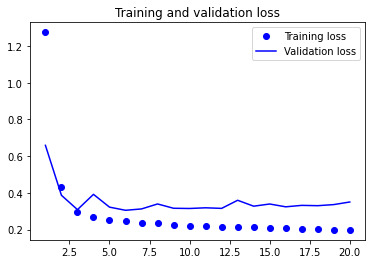

In [23]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Training and evaluating a dropout-regularized GRU-based model

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32,dropout=0.2,recurrent_dropout=0.2,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,steps_per_epoch=500,epochs=10,
                              validation_data=val_gen,validation_steps=val_steps)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


500/500 [==============================] - 5355s 11s/step - loss: 0.3497 - val_loss: 0.2920
Epoch 2/10
500/500 [==============================] - 5411s 11s/step - loss: 0.3111 - val_loss: 0.2787
Epoch 3/10
500/500 [==============================] - ETA: 0s - loss: 0.3027